Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Classes: ['cats', 'dogs']
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.9820 - loss: 0.0557 - val_accuracy: 0.9950 - val_loss: 0.0131
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9950 - loss: 0.0166 - val_accuracy: 0.9960 - val_loss: 0.0114
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9985 - loss: 0.0060 - val_accuracy: 0.9910 - val_loss: 0.0203
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9980 - loss: 0.0064 - val_accuracy: 0.9970 - val_loss: 0.0088
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9960 - loss: 0.0108 - val_accuracy: 0.9960 - val_loss: 0.0106
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9970 - loss: 0.0061 - val_accuracy: 0.9970 - val_loss: 0.0105
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 0.9960 - val_loss: 0.0097
Epo

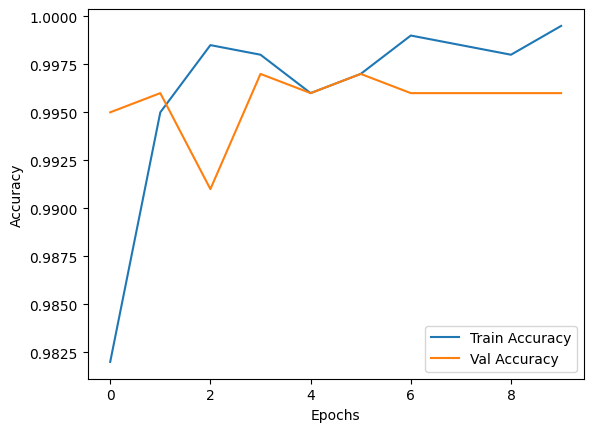

32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9960 - loss: 0.0135
Validation Accuracy: 99.60%
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


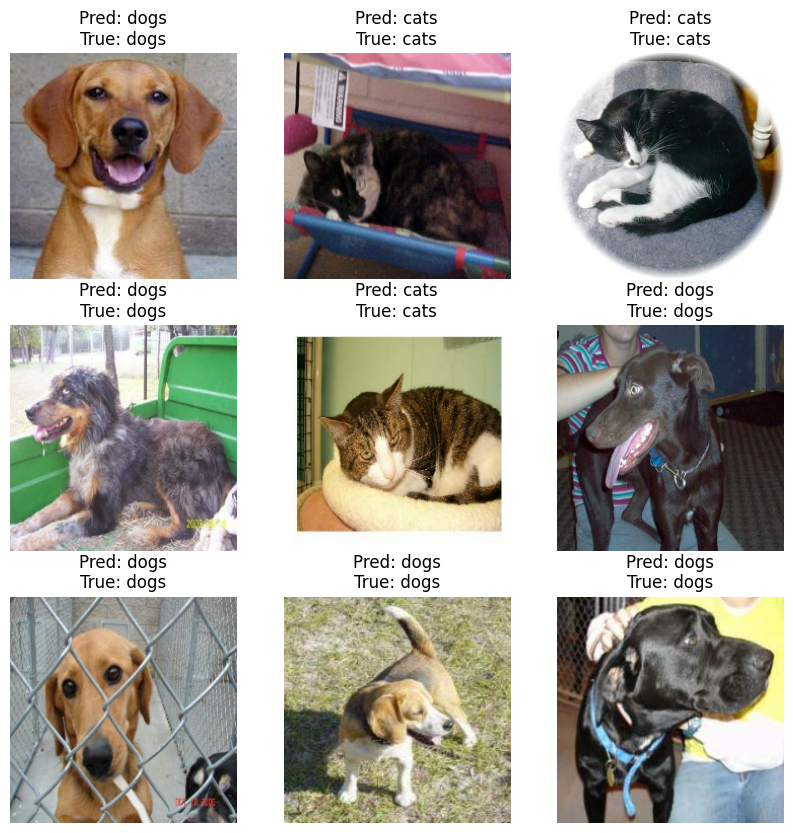

In [7]:
# ==== Transfer Learning with Pre-Extracted Dataset ====

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ==== Dataset directories ====
train_dir = r"C:\Users\niles\Downloads\cats_and_dogs_filtered\train"
val_dir = r"C:\Users\niles\Downloads\cats_and_dogs_filtered\validation"

# ==== Load datasets ====
img_height, img_width = 224, 224
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# ✅ Get class names BEFORE prefetch/cache
class_names = train_ds.class_names
print("Classes:", class_names)

# ✅ Then apply performance optimizations
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

# ==== Model ====
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# ==== Plot Accuracy ====
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend(); plt.show()

# ==== Evaluate ====
loss, acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {acc*100:.2f}%")

# ==== Show Predictions ====
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    pred_labels = tf.argmax(preds, axis=1)
    
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[labels[i]]}")
        plt.axis("off")
    plt.show()
